<a href="https://colab.research.google.com/github/11911148/basics/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.22 ms (started: 2021-06-28 05:14:14 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.15 s (started: 2021-06-28 05:14:50 +00:00)


In [3]:
from bing_image_downloader import downloader
downloader.download("laptops", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/laptops


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.techpowerup.com/img/15-04-29/MSI_Prestige_Series_laptop_01.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.windowscentral.com/sites/wpcentral.com/files/styles/large/public/field/image/2021/01/msi_nb_ge66_raiderstandard_photo01.png
[%] File Downloaded !

[%] Downloading Image #3 from https://clickynews.com/wp-content/uploads/2019/12/Laptop-feature.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://novamesa.com/wp-content/uploads/2016/06/accel-xg1200-trans.png
[%] File Downloaded !

[%] Downloading Image #5 from https://www.vortez.net/news_file/6490_msi laptops featuring true colour technology.jpg
[!] Issue getting: https://www.vortez.net/news_file/6490_msi laptops featuring true colour technology.jpg
[!] Error:: URL can't contain control characters. '/news_file/6490_msi laptops featuring true colour techno

In [4]:
from bing_image_downloader import downloader
downloader.download("mobiles", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/mobiles


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/474x/f7/4c/76/f74c769c0dff78b8319559b44ba5c25f--crossword-puzzle.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://maktechblog.com/wp-content/uploads/2014/06/Micromax-MAd.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.mostinside.com/wp-content/uploads/2016/09/Best-Camera-Mobiles-2016-4.png
[%] File Downloaded !

[%] Downloading Image #4 from https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=198698250892424
[Error]Invalid image, not saving https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=198698250892424

[!] Issue getting: https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=198698250892424
[!] Error:: Invalid image, not saving https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=198698250892424

[%] Downloading Image #4 from https://www.mobilesjin.com

In [5]:
from bing_image_downloader import downloader
downloader.download("washing machine", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/washing machine


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.lg.com/uk/images/washing-machines/md05786912/gallery/medium7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.lg.com/uk/images/washing-machines/md05786912/gallery/medium6.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://electronicscentre.com.au/wp-content/uploads/2019/09/1WD1411SBW-6.jpg?x74867
[Error]Invalid image, not saving https://electronicscentre.com.au/wp-content/uploads/2019/09/1WD1411SBW-6.jpg?x74867

[!] Issue getting: https://electronicscentre.com.au/wp-content/uploads/2019/09/1WD1411SBW-6.jpg?x74867
[!] Error:: Invalid image, not saving https://electronicscentre.com.au/wp-content/uploads/2019/09/1WD1411SBW-6.jpg?x74867

[%] Downloading Image #3 from https://d1goonq8m6npha.cloudfront.net/uploads/imported/4/LG-FH6F9BDS2-12KG-Centum-System-Washing-Machine-True-Steam-Turbowash-Tech-2540

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

targets = []
images = []
flatten_data = []
datadir = '/content/images'
categories = ['mobiles','laptops','washing machine']

for cat in categories:
  nums = categories.index(cat)
  path = os.path.join(datadir,cat)
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    # print(img_arr.shape)
    # plt.imshow(img_arr)
    img_resized = resize(img_arr,(150,150,3))
    flatten_data.append(img_resized.flatten())
    images.append(img_resized)
    targets.append(nums)

flatten_data = np.array(flatten_data)
targets = np.array(targets)
images = np.array(images)

time: 15.2 s (started: 2021-06-28 05:18:06 +00:00)


<BarContainer object of 3 artists>

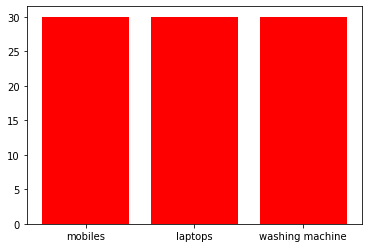

time: 215 ms (started: 2021-06-28 05:18:02 +00:00)


In [7]:
unique,count = np.unique(targets,return_counts=True)
plt.bar(categories,count,color='r')

In [9]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flatten_data,targets,
                                                    test_size=0.3,random_state=109)

time: 200 ms (started: 2021-06-28 05:18:39 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C': [1,10,100,1000],'kernel':['linear'] },
              { 'C': [1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001],'kernel':['rbf'] }
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 14s (started: 2021-06-28 05:19:04 +00:00)


In [11]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 0, 0, 0, 2])

time: 149 ms (started: 2021-06-28 05:22:18 +00:00)


In [12]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 5.23 ms (started: 2021-06-28 05:22:19 +00:00)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.5925925925925926

time: 6.06 ms (started: 2021-06-28 05:22:19 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[5, 2, 1],
       [3, 5, 1],
       [0, 4, 6]])

time: 6.36 ms (started: 2021-06-28 05:22:19 +00:00)


In [15]:
import pickle #Predict new image
pickle.dump(clf,open('img_model.p','wb'))

time: 36.8 ms (started: 2021-06-28 05:22:19 +00:00)


In [16]:
model = pickle.load(open('img_model.p','rb'))

time: 21.4 ms (started: 2021-06-28 05:22:19 +00:00)


Enter image URL from this categories(mobiles,laptops,washing machine)https://th.bing.com/th/id/OIP.gRTjbmbarLCWzFtRGtAFEgHaHa?pid=ImgDet&rs=1
(474, 474, 3)
Predicted Output:laptops


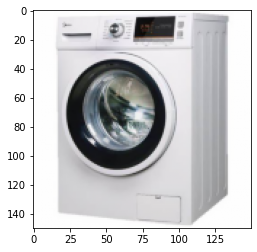

time: 2min 34s (started: 2021-06-28 05:43:07 +00:00)


In [19]:
# Testing Output
flatten_data = []
url = input('Enter image URL from this categories(mobiles,laptops,washing machine)')
img = imread(url)
print(img.shape)
img_resized = resize(img,(150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
print(f'Predicted Output:{y_out}')